# Image Completion - Filtering
- `Mean`: Recover image by filling of missing pixels(R,G,B) with the **mean** of adjacent nonmissing pixels(R,G,B).
- `Mediate`: Recover image by filling of missing pixels(R,G,B) with the **mediate** of adjacent nonmissing pixels(R,G,B).

## Motivation: Real-World Applications

### Local similarity: the nearby pixels are very similiar. 

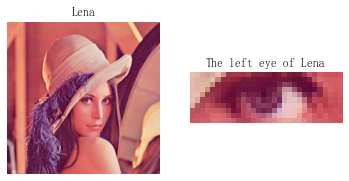

In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

lena = imageio.imread('datasets/color-images/lena.bmp')

dim1, dim2, dim3 = lena.shape
a = int(dim1/2)
b = int(dim1/2) + 10
c = int(dim2/2) - 10
d = int(dim2/2) + 20

plt.subplot(1, 2, 1)
plt.imshow(lena)
plt.title('Lena')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena[a:b, c:d, :])
plt.title('The left eye of Lena')
plt.axis('off')

plt.show()

## Image recovery by filtering funtion: **mean** and **mediate**

In [5]:
def imgfiltering(sparse_image, filtype = 'mean', sz = 5):
    r = sz
    rig = int((r - 1) / 2)
    filter = np.ones((r,r)) / r ** 2
    position = np.where(sparse_image != 0)
    image_rec = np.zeros(sparse_image.shape)
    dim1, dim2, dim3 = sparse_image.shape
    sparse_tensor = np.zeros((dim1 + r - 1, dim2 + r - 1, 3))
    sparse_tensor[rig:dim1 + rig,rig:dim2 + rig,:] = sparse_image
    for k in range(dim3):
        for i in range(rig, dim1 + rig):
            for j in range(rig, dim2 + rig):
                Madj = sparse_tensor[(i -  rig):(i + rig), (j - rig):(j + rig), k]
                Vadj = Madj[Madj!=0]
                if filtype == 'meadian':
                    image_rec[i - rig, j - rig, k] = np.median(Vadj)
                elif filtype == 'mean': 
                    image_rec[i - rig, j - rig, k] = np.mean(Vadj)
    image_rec[position] = sparse_image[position]
    image_rec = np.round(image_rec).astype(int)
    image_rec[np.where(image_rec > 255)] = 255
    image_rec[np.where(image_rec < 0)] = 0
    return image_rec

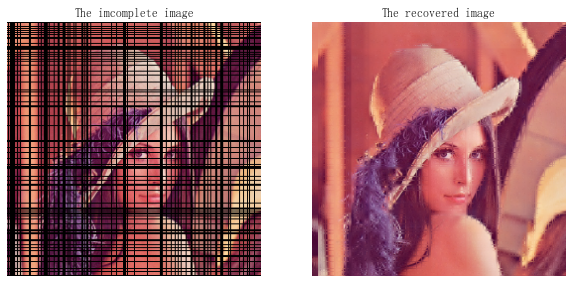

In [6]:
name0 = ["lena"]
name = ["lena_rcmar"]
image = imageio.imread('datasets/color-images/{}.bmp'.format(name0[0]))
sparse_image = imageio.imread('datasets/color-images/{}.bmp'.format(name[0]))

plt.subplots(1, 2, figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(sparse_image)
plt.title('The imcomplete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgfiltering(sparse_image, filtype = 'mean', sz = 7))
plt.title('The recovered image')
plt.axis('off')
plt.show()